In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import statsmodels.api as sm

%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
sns.set_style("whitegrid")

In [12]:
player_detail = pd.read_csv('../dataset/player_detail.csv')

In [13]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [14]:
player_overall = player_detail[['player_api_id', 'date', 'overall_rating']]

In [15]:
# Combine features with same purposes
feature_group = {
    'passing':['crossing', 'short_passing', 'long_passing'],
    'shooting':['finishing','heading_accuracy','free_kick_accuracy','shot_power','long_shots'],
    'defence':['interceptions','marking','standing_tackle','sliding_tackle'],
    'goalkeeping':['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes'],
    'offence_misc':['ball_control', 'positioning', 'vision', 'agility'],
    'movement':['dribbling','acceleration','sprint_speed','stamina']
                  }

In [16]:
scale = MinMaxScaler()

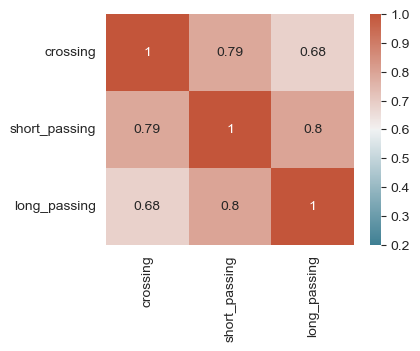

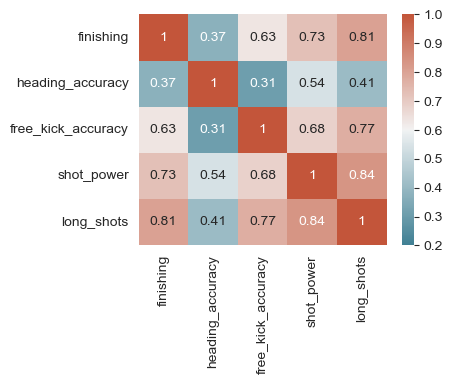

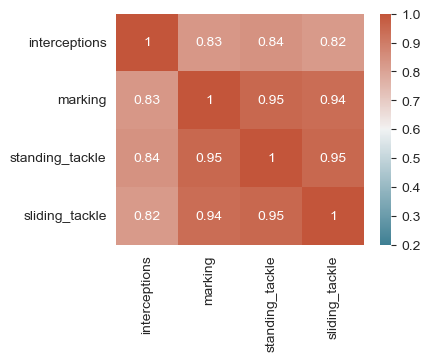

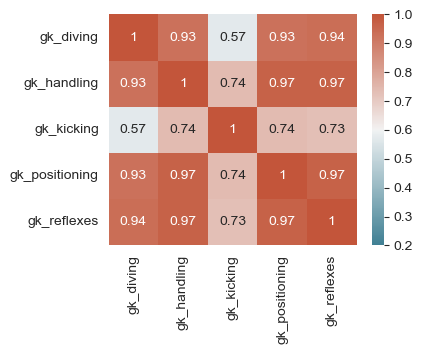

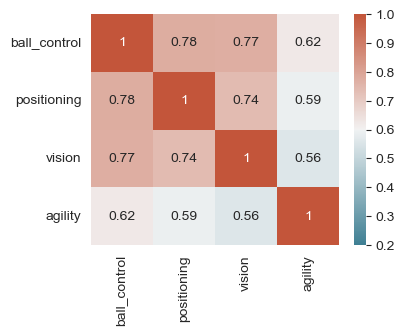

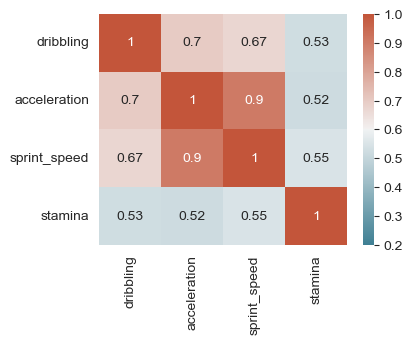

In [17]:
# Check out the correlation between features in each combination
for key, items in feature_group.items():
    df = player_detail[items]
    columns = df.columns
    scale.fit(df)
    df_scale = pd.DataFrame(scale.transform(df), columns = columns)
    plt.subplots(figsize=(4,3))
    sns.heatmap(df_scale.corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin=0.2, vmax=1)
    plt.show()

In [18]:
# Put attributes that have high correlation with each other in the same group so that they don't cancel out each other
feature_group = {
    'passing':['crossing', 'short_passing', 'long_passing'],
    'shooting':['finishing','free_kick_accuracy','shot_power','long_shots'],
    'defence':['interceptions','marking','standing_tackle','sliding_tackle'],
    'goalkeeping':['gk_diving', 'gk_handling', 'gk_positioning','gk_reflexes'],
    'offence_misc':['ball_control', 'positioning', 'vision'],
    'movement':['dribbling','acceleration','sprint_speed']
                  }

In [19]:
player_group = player_detail[['player_api_id', 'date']]

In [20]:
for key, value in feature_group.items():
    player_group[key] = player_detail[value].mean(axis = 1).round(2)

In [21]:
player_group.head()

,player_api_id,date,passing,shooting,defence,goalkeeping,offence_misc,movement
0,505942,2016,58.0,43.25,68.25,8.25,49.33,58.33
1,505942,2015,58.0,43.25,68.25,8.25,49.33,58.33
2,505942,2015,58.0,43.25,60.25,8.25,49.33,58.33
3,505942,2015,57.0,42.25,57.75,7.25,48.33,58.00
4,505942,2007,57.0,42.25,57.75,7.25,48.33,58.00


In [22]:
player_group_date = player_group.groupby(['player_api_id', 'date']).mean().reset_index()

In [23]:
player_group_date = player_group_date.sort_values(['date'], ascending = True)

In [24]:
player_group_date.to_csv('../dataset/player_group_date.csv', index = False)